In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

## Smoothig spatial filters

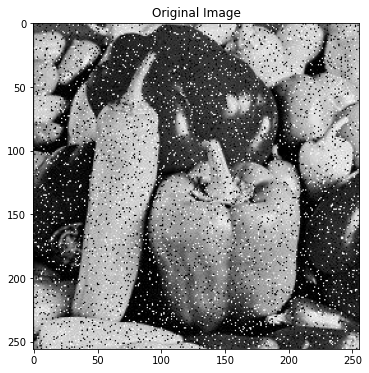

In [2]:
noise_img = cv2.imread('saltandpepper.png')
noise_img = cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB)

noise_img_1 = noise_img.copy()
noise_img_2 = noise_img.copy()
noise_img_3 = noise_img.copy()

plt.figure(figsize=(16,6))
plt.title('Original Image')
plt.imshow(noise_img);

In [3]:
print('Image Shape = ', noise_img.shape)

Image Shape =  (256, 256, 3)


In [4]:
kernel = np.ones(shape=(5,5), dtype=np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [5]:
# to convolve a kernel with an image
filter_img = cv2.filter2D(noise_img, -1, kernel)

# This is done by convolving an image with a normalized box filter. 
# It simply takes the average of all the pixels under the kernel area and replaces the central element.
average_img = cv2.blur(noise_img_1, (5,5))


# it takes the median of all the pixels under the kernel area and the central element is replaced with this median value
median = cv2.medianBlur(noise_img_2, 9)

# it is highly effective in noise removal while keeping edges sharp
blur = cv2.bilateralFilter(noise_img_3, 9, 75, 75)

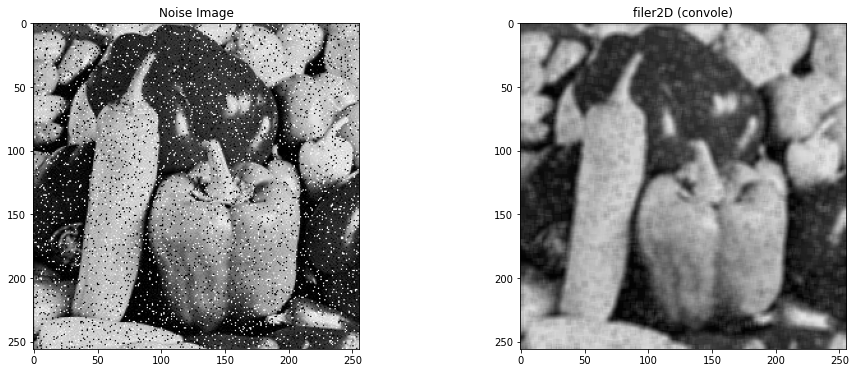

In [6]:
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.imshow(noise_img)
plt.title('Noise Image');

plt.subplot(1, 2, 2)
plt.imshow(filter_img)
plt.title('filer2D (convole)');

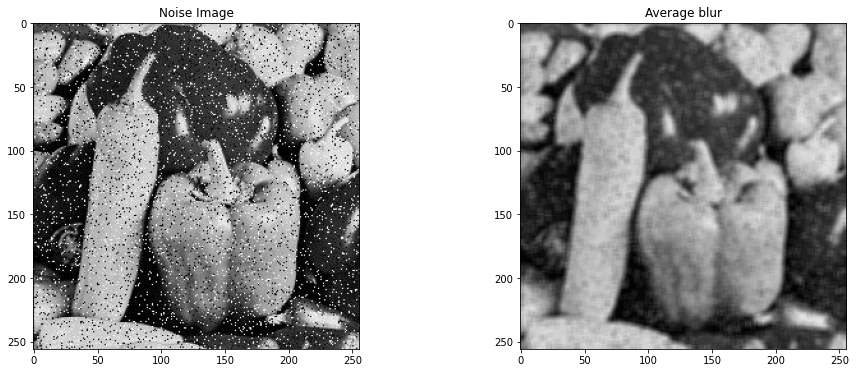

In [7]:
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.imshow(noise_img)
plt.title('Noise Image');

plt.subplot(1, 2, 2)
plt.imshow(average_img)
plt.title('Average blur');

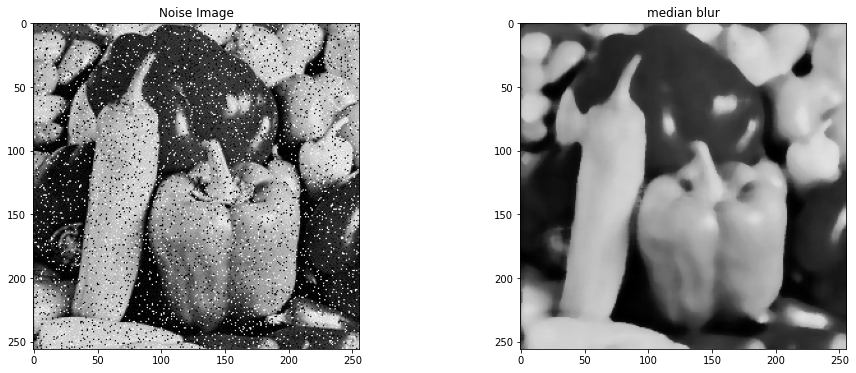

In [8]:
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.imshow(noise_img)
plt.title('Noise Image');

plt.subplot(1, 2, 2)
plt.imshow(median)
plt.title('median blur');

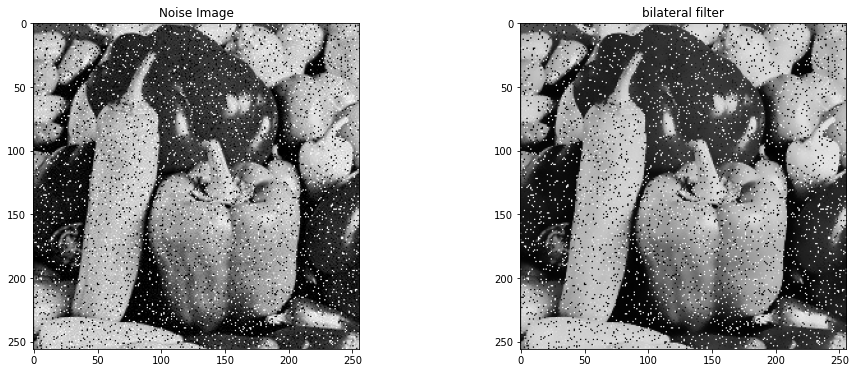

In [9]:
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.imshow(noise_img)
plt.title('Noise Image');

plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title('bilateral filter');

### Comparison

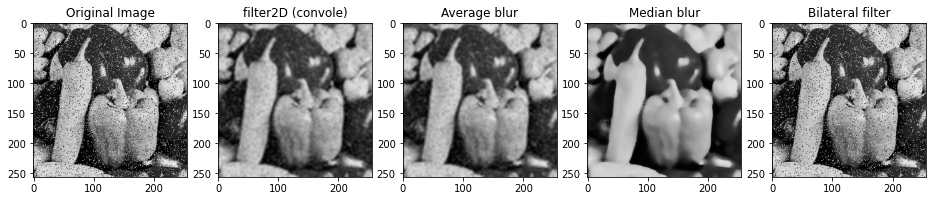

In [10]:
plt.figure(figsize=(16,6))

plt.subplot(1, 5, 1)
plt.imshow(noise_img)
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(filter_img)
plt.title('filter2D (convole)')

plt.subplot(1, 5, 3)
plt.imshow(average_img)
plt.title('Average blur')

plt.subplot(1, 5, 4)
plt.imshow(median)
plt.title('Median blur')

plt.subplot(1, 5, 5)
plt.imshow(blur)
plt.title('Bilateral filter');

## Sharpening spatial filters

In [11]:
img = cv2.imread('sudoku.jpg',0)
print('Image Shape = ', img.shape)

Image Shape =  (1024, 962)


In [12]:
# x gradient
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

# y gradient
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

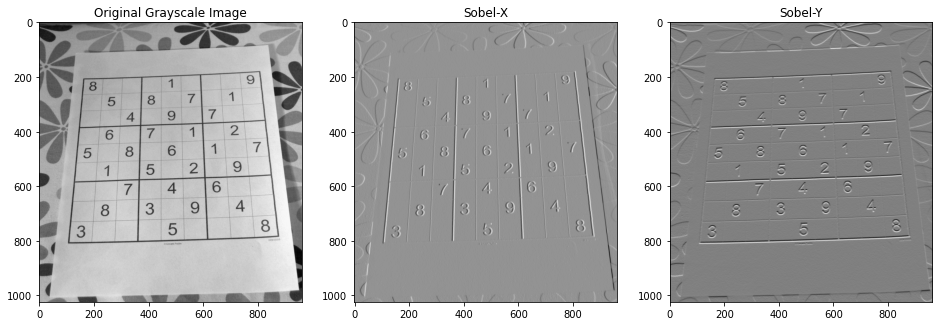

In [13]:
plt.figure(figsize=(16,10))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 3, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel-X')

plt.subplot(1, 3, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel-Y');

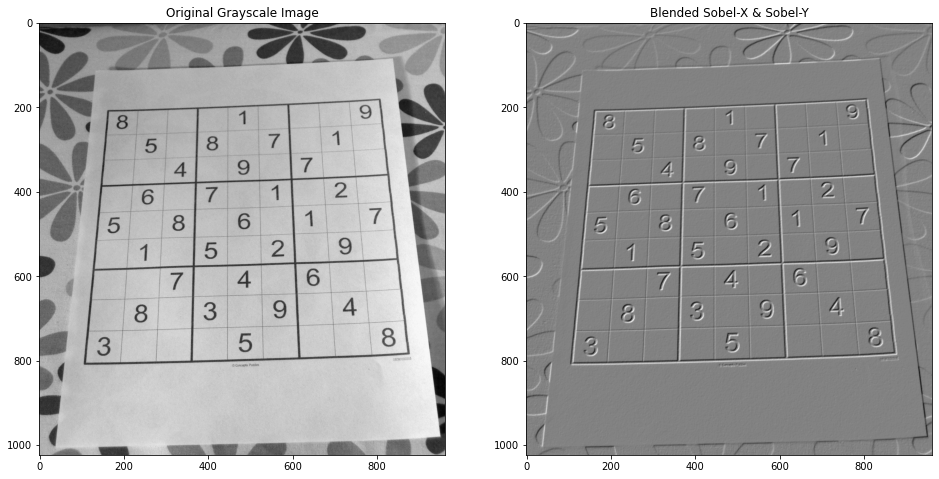

In [14]:
# merging sobelx and sobely
blended_xy = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5, gamma=0)

plt.figure(figsize=(16,10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(blended_xy, cmap='gray')
plt.title('Blended Sobel-X & Sobel-Y');

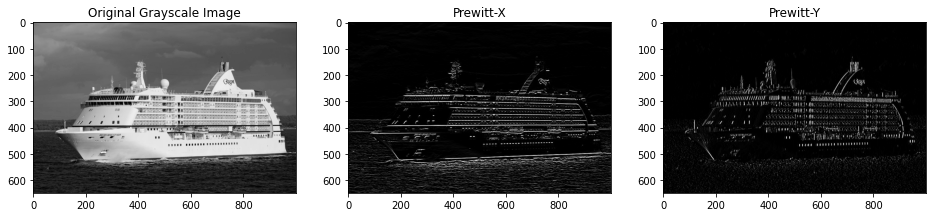

In [15]:
# prewitt operator
img = cv2.imread('ship.jpeg',0)

kernel_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

prewitt_x = cv2.filter2D(img, -1, kernel_x)
prewitt_y = cv2.filter2D(img, -1, kernel_y)

plt.figure(figsize=(16,10))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 3, 2)
plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt-X')

plt.subplot(1, 3, 3)
plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt-Y');

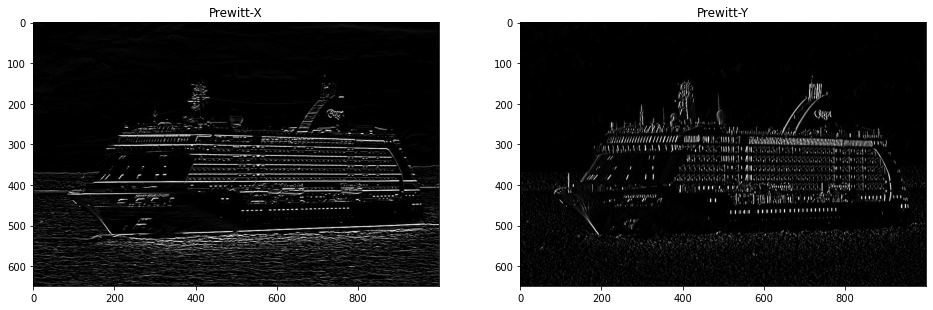

In [16]:
plt.figure(figsize=(16,10))

plt.subplot(1, 2, 1)
plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt-X')

plt.subplot(1, 2, 2)
plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt-Y');

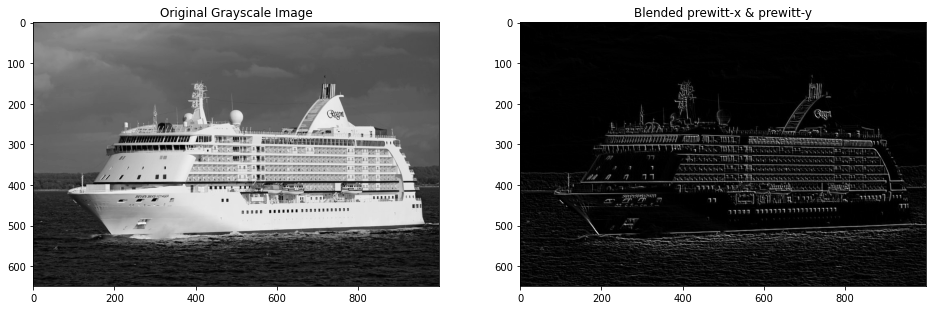

In [17]:
# merging prewitt_x and prewitt_y
blended_xy = cv2.addWeighted(src1=prewitt_x, alpha=0.5, src2=prewitt_y, beta=0.5, gamma=0)

plt.figure(figsize=(16,10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(blended_xy, cmap='gray')
plt.title('Blended prewitt-x & prewitt-y');